In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('C:/Users/user/Desktop/물리학 프로그래밍/05000266/part7/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')


훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)




In [2]:
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


0.7087009262975685




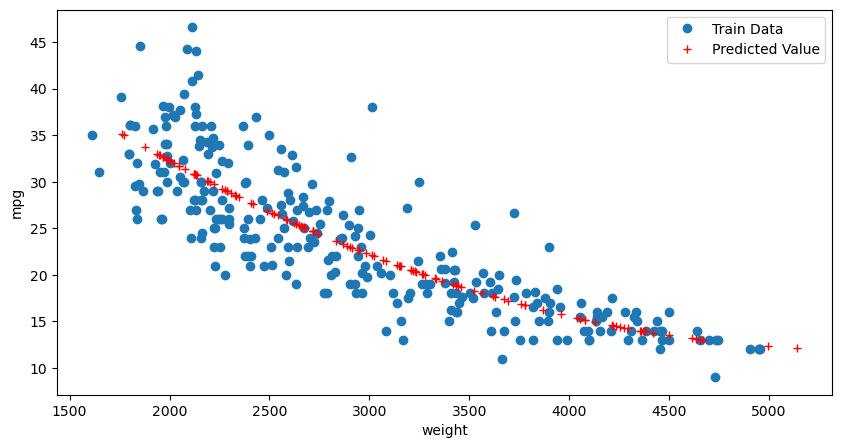

In [3]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

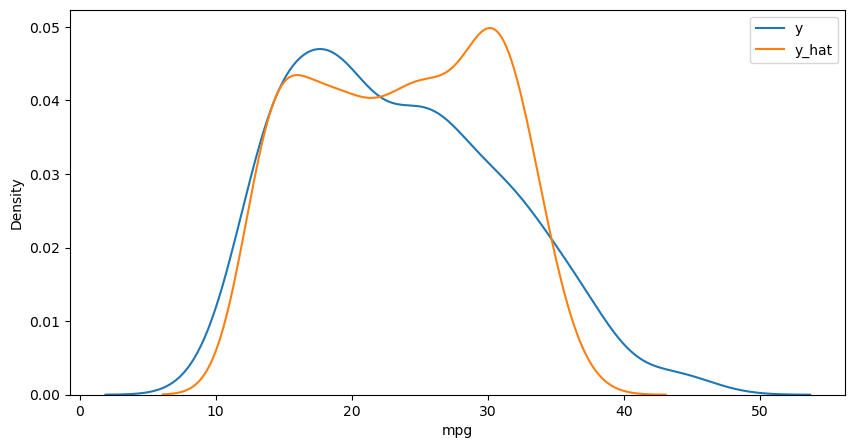

In [4]:
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()